In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/Documentos/Docs/docs-fct/SI/Lab2" 
#%cd "/drive/MyDrive/copia_si" #Bruno
#%cd "copia_si"
%ls
%pwd


/content/drive/MyDrive/Documentos/Docs/docs-fct/SI/Lab2
 SI_Lab2_20_21.ipynb   si_lab2_dataset.gsheet
 si_lab2_dataset.csv  'SI_labwork_2(2020).pdf'


'/content/drive/MyDrive/Documentos/Docs/docs-fct/SI/Lab2'

#### ![FCT](https://www.acessolivre.pt/wp-content/uploads/2015/10/Imagem-UNL.jpg "FCT-UNL")

## **SI 20/21 - Predicting the Output for a Multistage Factory Process using Machine Learning**

---

### **Problem Description**

A multistage manufacturing process refers to a system encompassing multiple components, stations or stages required to finish the final product, being very common in modern manufacturing. Typically, the quality of the final product depends on the complex interactions between different stages. Thus, the quality characteristics at one stage are not only influenced by local variations at that stage, but also by variations propagated from upstream stages.

In this context predictive models based on machine learning can be used in the development of real time process controllers, anomaly detection, quality control, etc.

<img width=400px align="right" src="https://p2.piqsels.com/preview/730/1011/600/plant-production-industry-manufactures-thumbnail.jpg" title="Source: [Online] https://p2.piqsels.com/preview/730/1011/600/plant-production-industry-manufactures-thumbnail.jpg">
      
### **Data**

The dataset contains data sampled every minute from one production run of a multistage continuous flow manufacturing process spanning several hours. The focus is put on three machines operating in parallel at the first stage, which then feed their outputs into a step that combines the flows. 

The output from the combiner step is measured in 6 different locations. The **goal** is to predict the measurements of the output from this stage, based on the data from the shopfloor environment and operations upstream. 

### **Required Material**

The assignment will be developed using **Google Colaboratory** to ensure that everyone has access to the same computational resources, without requiring additional configuration effort.

https://colab.research.google.com/

Google Colab provides a platform that allows you to write and execute Python notebooks
in the browser, with minimal configuration required and free access to GPUs.

The .ipynb provided by the the teaching staff should be uploaded to the student's Google Drive (using the University's student account) and opened directly in Colab.

**Recommended Packages:** *Pandas* and *Numpy* (data structures and manipulation), *Scikit-Learn* (Machine Learning), *Matplotlib* and *Seaborn* (visualization).

### **Submission Guidelines and Deadline**
* Completed projects should be submitted via the course's **Moodle** page before the end of the deadline.
* Projects should be executed in groups of 2 or 3 (maximum) students. 
* The project should be submitted as a **single .ipynb** notebook file, named following the template **"*studentNumber1_studentNumber2_studentNumber3.rar*"** (e.g. *31444_31445_31446.rar*) containing:
   * The complete jupyter notebook contemplating the data analysis / machine learning part of the assignment. You can use the template provided in the CLIP platform which simultaneous serves as a guideline, project template and report.
* Deadline is **19 of December, 23:59 GMT**.

### **Evaluation Criteria**

All of the goal/value pairs listed below are based on the assumption that a correct implementation is submitted. 

Feel free to fill in the *Completed* column in accordance to your submission for the discussion (replace "*-*" with "*X*" when suitable).

| Goal                                                     | Value | Completed |
|:--------------------------------------------------------|:------|:----------:| 
| 💾 Loading and preparing train/test data                | 4     |     x      |
| 🏋️ Training **at least 3** different regressors         | 6     |     x      |
| 💯 Evaluating each regressor using adequate metrics     | 4     |     x      |
| 📈 Plotting the results for comparison                  | 3     |     x      |
| 💬 Discussing the results                               | 1     |     x      |
| ❓  Additional features (Free choice)                           | 2     |    x       |

Please refer to the lab staff for additional info regarding possible additional features. Examples include for instance performing feature extraction on the original dataset to check if newly created features improve performance or tuning the models' hyper-parameters (please refer to the [documentation](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection) which includes several examples) to optimize performance.

### **Lab Planning**

* Lab 1 (week of 30/11/20) - Intro, Data Ingestion and Exploration
* Lab 2 (week of 07/12/20) - Model Training and Evaluation
* Lab 3 (week of 14/12/20) - Visualization and Bonus Features


---



### **TO DO**: 
1) Load the training data 
* Use read_csv (pandas) to load data into a dataframe 
* Use the dataframe's head() to check the first few rows 


In [ ]:
import pandas as pd

df = pd.read_csv('si_lab2_dataset.csv')
df.head()

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,Machine1.MotorAmperage.U.Actual,Machine1.MotorRPM.C.Actual,Machine1.MaterialPressure.U.Actual,Machine1.MaterialTemperature.U.Actual,Machine1.ExitZoneTemperature.C.Actual,Machine2.RawMaterial.Property1,Machine2.RawMaterial.Property2,Machine2.RawMaterial.Property3,Machine2.RawMaterial.Property4,Machine2.RawMaterialFeederParameter.U.Actual,Machine2.Zone1Temperature.C.Actual,Machine2.Zone2Temperature.C.Actual,Machine2.MotorAmperage.U.Actual,Machine2.MotorRPM.C.Actual,Machine2.MaterialPressure.U.Actual,Machine2.MaterialTemperature.U.Actual,Machine2.ExitZoneTemperature.C.Actual,Machine3.RawMaterial.Property1,Machine3.RawMaterial.Property2,Machine3.RawMaterial.Property3,Machine3.RawMaterial.Property4,Machine3.RawMaterialFeederParameter.U.Actual,Machine3.Zone1Temperature.C.Actual,Machine3.Zone2Temperature.C.Actual,Machine3.MotorAmperage.U.Actual,Machine3.MotorRPM.C.Actual,Machine3.MaterialPressure.U.Actual,Machine3.MaterialTemperature.U.Actual,Machine3.ExitZoneTemperature.C.Actual,FirstStage.CombinerOperation.Temperature1.U.Actual,FirstStage.CombinerOperation.Temperature2.U.Actual,FirstStage.CombinerOperation.Temperature3.C.Actual,Stage1.Output.Measurement1.U.Actual,Stage1.Output.Measurement2.U.Actual,Stage1.Output.Measurement3.U.Actual,Stage1.Output.Measurement4.U.Actual,Stage1.Output.Measurement5.U.Actual,Stage1.Output.Measurement6.U.Actual
0,06/03/2019 10:52:00,17.24,23.53,11.54,200,963.0,247,1241.26,72.0,72.3,48.03,10.48,436.76,76.3,75.1,12.59,236,601.11,257,200.75,69.37,69.06,73.25,13.89,246.68,68.8,60.1,9.02,186,421.16,200,203.95,78.2,78.4,337.40,13.50,263.71,65.3,65.0,99.1,108.2,80.0,0.0,12.16,0.00,17.30,5.54,2.69
1,06/03/2019 10:52:01,17.24,23.53,11.54,200,963.0,247,1246.09,72.0,72.3,48.03,10.48,436.77,76.3,75.1,12.59,236,601.11,257,220.16,69.35,69.05,73.19,13.89,246.02,69.0,60.0,9.02,186,421.16,200,213.36,78.1,78.4,341.85,13.59,262.88,65.3,65.0,99.1,109.2,80.0,0.0,0.00,0.00,17.31,5.13,2.70
2,06/03/2019 10:52:02,17.24,23.53,11.54,200,963.0,247,1246.29,72.0,72.3,48.16,10.48,425.46,76.3,75.1,12.59,236,601.11,257,216.84,69.37,69.07,73.19,13.85,247.18,68.9,60.0,9.02,186,421.16,200,225.25,78.1,78.5,338.71,14.00,262.63,65.3,65.0,99.6,111.0,80.0,0.0,0.00,0.00,17.31,5.13,2.70
3,06/03/2019 10:52:03,17.24,23.53,11.54,200,963.0,247,1247.59,72.0,72.3,48.57,10.48,437.01,76.3,75.1,12.59,236,601.11,257,208.61,69.38,69.08,72.81,13.90,249.92,69.1,59.9,9.02,186,421.16,200,213.99,78.1,78.5,339.15,13.67,262.22,65.4,65.0,99.6,109.2,80.0,0.0,0.00,0.00,17.31,5.13,2.70
4,06/03/2019 10:52:04,17.24,23.53,11.54,200,963.0,247,1252.83,72.1,72.4,48.57,10.48,425.18,76.4,75.1,12.59,236,601.11,257,212.31,69.40,69.07,73.00,13.89,250.58,68.9,59.9,9.02,186,421.16,200,200.86,78.0,78.5,337.05,13.72,262.17,65.4,65.0,99.6,109.8,80.0,0.0,0.00,31.44,17.30,5.15,2.72


### **TO DO**: 
2) Check the shape and sum of missing values per feature using the .shape and .isna().sum() functions from Pandas' Dataframe.

In [ ]:
print("Original shape: ", df.shape)
print("Number of missing values per feature: ", df.isna().sum())

Original shape:  (14088, 48)
Number of missing values per feature:  time_stamp                                            0
AmbientConditions.AmbientHumidity.U.Actual            0
AmbientConditions.AmbientTemperature.U.Actual         1
Machine1.RawMaterial.Property1                        1
Machine1.RawMaterial.Property2                        0
Machine1.RawMaterial.Property3                        0
Machine1.RawMaterial.Property4                        0
Machine1.RawMaterialFeederParameter.U.Actual          1
Machine1.Zone1Temperature.C.Actual                    1
Machine1.Zone2Temperature.C.Actual                    0
Machine1.MotorAmperage.U.Actual                       1
Machine1.MotorRPM.C.Actual                            0
Machine1.MaterialPressure.U.Actual                    1
Machine1.MaterialTemperature.U.Actual                 0
Machine1.ExitZoneTemperature.C.Actual                 0
Machine2.RawMaterial.Property1                        0
Machine2.RawMaterial.Property2      

### **TO DO**: 
3) Drop rows containing missing values using .dropna . Verify if rows were correctly dropped by printing the dataframe's shape.

In [ ]:
df.dropna(inplace=True)
print("Shape after cleaning missing values: ", df.shape)

Shape after cleaning missing values:  (14071, 48)


### **TO DO**: 
4) Generate descriptive statistics. These include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

*Side note:*
> The .describe() function of a Pandas dataframe provides descriptive statistics that include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.






In [ ]:
df.describe()

,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,Machine1.MotorAmperage.U.Actual,Machine1.MotorRPM.C.Actual,Machine1.MaterialPressure.U.Actual,Machine1.MaterialTemperature.U.Actual,Machine1.ExitZoneTemperature.C.Actual,Machine2.RawMaterial.Property1,Machine2.RawMaterial.Property2,Machine2.RawMaterial.Property3,Machine2.RawMaterial.Property4,Machine2.RawMaterialFeederParameter.U.Actual,Machine2.Zone1Temperature.C.Actual,Machine2.Zone2Temperature.C.Actual,Machine2.MotorAmperage.U.Actual,Machine2.MotorRPM.C.Actual,Machine2.MaterialPressure.U.Actual,Machine2.MaterialTemperature.U.Actual,Machine2.ExitZoneTemperature.C.Actual,Machine3.RawMaterial.Property1,Machine3.RawMaterial.Property2,Machine3.RawMaterial.Property3,Machine3.RawMaterial.Property4,Machine3.RawMaterialFeederParameter.U.Actual,Machine3.Zone1Temperature.C.Actual,Machine3.Zone2Temperature.C.Actual,Machine3.MotorAmperage.U.Actual,Machine3.MotorRPM.C.Actual,Machine3.MaterialPressure.U.Actual,Machine3.MaterialTemperature.U.Actual,Machine3.ExitZoneTemperature.C.Actual,FirstStage.CombinerOperation.Temperature1.U.Actual,FirstStage.CombinerOperation.Temperature2.U.Actual,FirstStage.CombinerOperation.Temperature3.C.Actual,Stage1.Output.Measurement1.U.Actual,Stage1.Output.Measurement2.U.Actual,Stage1.Output.Measurement3.U.Actual,Stage1.Output.Measurement4.U.Actual,Stage1.Output.Measurement5.U.Actual,Stage1.Output.Measurement6.U.Actual
count,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,1.407100e+04,14071.000000
mean,15.331392,23.843480,11.850955,205.676640,951.623678,248.868737,1242.782131,72.013311,72.012773,70.337820,11.071685,409.016935,81.470354,75.965545,12.793403,239.911591,566.367247,256.217682,202.591444,68.996910,69.100997,73.398745,13.896803,226.121548,76.813025,60.001361,9.090745,205.638618,425.007964,203.037808,202.380479,78.008290,78.004914,345.115456,13.269817,246.749568,74.140641,65.008235,108.915284,84.883887,80.003712,8.055464,11.356489,32.877711,17.965137,1.493326e+00,2.880966
std,1.188786,0.373492,0.510078,11.610716,126.723695,3.298969,95.831195,0.063165,0.406302,5.521117,0.635063,20.468929,0.929056,2.058674,0.107298,2.063423,18.327320,0.412685,15.107278,0.057051,0.108875,0.395964,0.029170,3.098536,0.851434,0.162106,0.396763,16.319586,9.562258,2.177515,15.655831,0.076795,0.114710,9.080889,0.434524,6.123396,2.056710,0.062472,5.669093,18.577822,0.118395,6.903736,1.050356,3.862025,4.199665,2.543083e+00,0.941176
min,13.840000,23.020000,11.540000,200.000000,601.110000,247.000000,231.300000,71.900000,71.300000,44.400000,10.390000,359.470000,76.300000,69.700000,12.590000,236.000000,556.700000,256.000000,0.000000,68.670000,67.780000,71.560000,13.820000,218.870000,68.800000,59.598710,8.830000,186.000000,408.970000,200.000000,0.000000,77.278364,77.700000,321.250000,11.960000,235.060000,65.300000,64.800000,45.300000,53.300000,79.600000,-3.132803,-4.927832,-7.688987,-0.003638,-1.630000e-20,-1.225095
25%,14.040000,23.530000,11.540000,200.000000,963.000000,247.000000,1257.170000,72.000000,71.600000,69.003133,10.520000,408.960000,81.000000,75.000000,12.850000,241.000000,556.700000,256.000000,194.160000,68.980000,69.070000,73.190000,13.870000,223.890000,76.900000,59.900000

### **TO DO**: 
5) Plot the correlation matrix for the dataset.

*Side note:*

> The .corr() function computes the pairwise correlation of columns, excluding NA/null values.  Seaborn and Matplotlib let us visualize it in a heatmap.


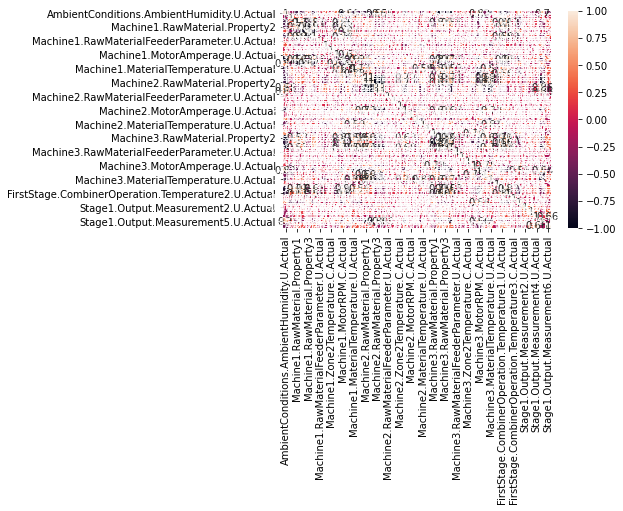

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

#plt.matshow(corrMatrix)
#plt.show()

### **TO DO**: 
6) Build a dictionary with key/value pairs for each metric and calculate its value using the corresponding sklearn.metrics call. Build a pandas dataframe from the dict using pd.DataFrame.from_dict

*Side node:*

> The explained_variance_score computes the explained variance regression score. If ^y is the estimated target output, y the corresponding (correct) target output, and  is Variance, the square of the standard deviation, then the explained variance is estimated as follow:
<br>
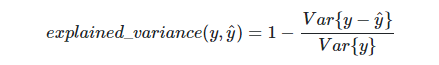
<br> The best possible score is 1.0, lower values are worse.
<br>

> 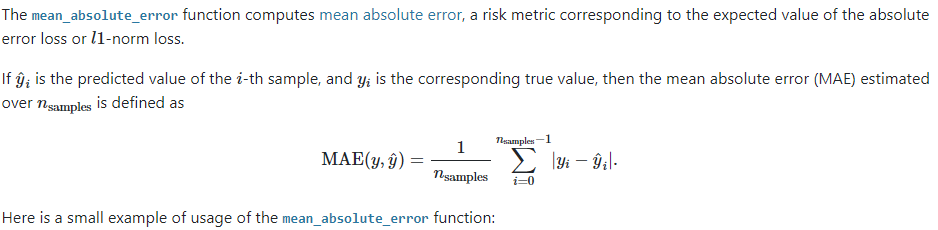

<br> 

> 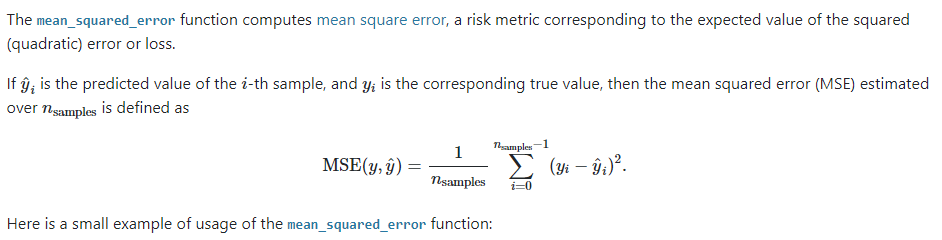

<br>

> 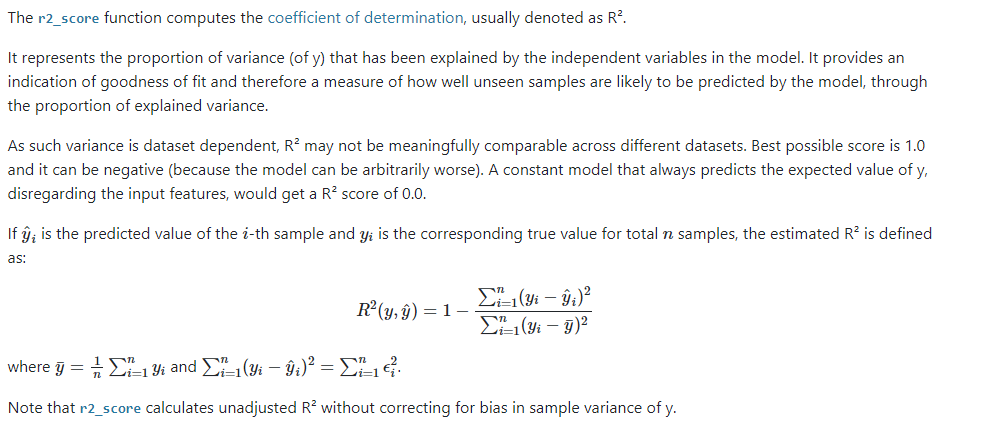


In [ ]:
from sklearn.metrics import explained_variance_score as evs, mean_absolute_error as mae, mean_squared_error as mse, r2_score as r2

def evaluate_regressor(name, y_test, y_pred):  
    """Calculate the main regression metrics supporting multi-target cases for a given model.  

    Args:
        name (str): The trained model's name
        y_test (series): Contains the ground truth values (aka y_true)
        y_pred (series): Contains the predicted values for the test set
        
    Returns:
        df_metrics (DataFrame): The predicted metrics in a DataFrame
        
    """
    # If True returns MSE value, if False returns RMSE value.
    # mean_squared_error(y_true, y_pred, squared=False)

    dict_metrics = {
        'Explained Variance': evs(y_test,y_pred),
        'MAE': mae(y_test, y_pred),
        'MSE': mse(y_test,y_pred, squared=True),
        'RMSE': mse(y_test,y_pred, squared=False),
        'R2': r2(y_test,y_pred),
    }

    # change the dict into a dataFrame format (lines x columns)
    df_metrics = pd.DataFrame.from_dict(dict_metrics,orient='index')
    df_metrics.columns = [name]
    return df_metrics

### **TO DO**: 
7) Train/Test Split:
* Split the dataset into X (inputs) and Y (outputs) (suggestion: use .iloc)

* Then use train_test_split from scikit-learn to further split them into X_train, X_test, y_train, and y_test with and appropriate test size (e.g. 20% or 33%)

* Ensure the data is shuffled, since we are not interested in the sequence, but instead want to see if there's any relation between the machine/process parameters in the multistage process upstream and the output

see also: **Cross Validation** (https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation); maybe it count as extra feature


In [ ]:
from sklearn.model_selection import train_test_split

print("DataFrame",df)

#last 6 columns of our dataset are output
x = df.iloc[:,:-6].values
print("\nInputs\n\n",x)
print(x.shape)

y = df.iloc[:,-6:].values
print("\nOutputs\n\n",y)
print(y.shape)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33) # by default, shuffle=True

print("\nTraining x:\n\n" , x_train); print("\nShape x_train: ", x_train.shape)
print("\nTest x:\n\n" , x_test); print("\nShape x_test: ", x_test.shape)
print("\nTraining y:\n\n" , y_train); print("\nShape y_train: ", y_train.shape)
print("\nTest y:\n\n" , y_test); print("\nShape y_test: ", y_test.shape)



DataFrame                 time_stamp  ...  Stage1.Output.Measurement6.U.Actual
0      06/03/2019 10:52:00  ...                                 2.69
1      06/03/2019 10:52:01  ...                                 2.70
2      06/03/2019 10:52:02  ...                                 2.70
3      06/03/2019 10:52:03  ...                                 2.70
4      06/03/2019 10:52:04  ...                                 2.72
...                    ...  ...                                  ...
14083  06/03/2019 14:47:53  ...                                 3.41
14084  06/03/2019 14:47:54  ...                                 3.41
14085  06/03/2019 14:47:55  ...                                 3.41
14086  06/03/2019 14:47:56  ...                                 3.30
14087  06/03/2019 14:47:57  ...                                 3.30

[14071 rows x 48 columns]

Inputs

 [['06/03/2019 10:52:00' 17.24 23.53 ... 99.1 108.2 80.0]
 ['06/03/2019 10:52:01' 17.24 23.53 ... 99.1 109.2 80.0]
 ['06/03/20

### **TO DO**: 
8) Store the time_stamp for later in case we want to do some visualizations, and remove it from training/test set with .drop.

As previously stated, we are not interested in the temporal dimension of the dataset.

In [ ]:
print(x_train.shape, x_test.shape)

time_stamp_saver = x_train[:,0]

x_train= pd.DataFrame(data=x_train)
x_test= pd.DataFrame(data=x_test)

x_train = x_train.drop(x_train.columns[0],axis=1)
x_test =  x_test.drop(x_test.columns[0],axis=1)

print(x_train.shape, x_test.shape)
print('\n\n',time_stamp_saver)

(9427, 42) (4644, 42)
(9427, 41) (4644, 41)


 ['06/03/2019 11:16:57' '06/03/2019 11:56:28' '06/03/2019 11:52:35' ...
 '06/03/2019 11:28:50' '06/03/2019 11:48:13' '06/03/2019 12:04:33']


### **TO DO**: 

9) Train at least 3 different regression models. Experiment with the model parameters (see the scikit-learn documentation) to aim for the best performance you can achieve.

**Simple Linear Regression**

In [ ]:
# Imports
from sklearn.linear_model import LinearRegression
import numpy as np
np.set_printoptions(suppress=True) # instead of cientific notation we get a float


#Instantiate regressor
reg = LinearRegression(normalize=True)

# Fit the regressor to the training data
reg.fit(x_train,y_train)

# Generate predictions from test set
y_pred_lin = reg.predict(x_test)

print('\nPredicted:\n\n',y_pred_lin)
print('\nTest:\n\n',y_test)

# Evaluate using evaluate_regressor
df_rfr_metrics = evaluate_regressor('Linear Simple Regression',y_test,y_pred_lin)

print("\n\nObtained metrics:" , df_rfr_metrics)


Predicted:

 [[12.75       10.9296875  30.234375   16.8515625   5.34375     2.046875  ]
 [ 1.         11.421875   33.8359375  19.09375    -0.0234375   3.328125  ]
 [ 6.         12.078125   32.265625   18.484375    5.6953125   2.671875  ]
 ...
 [12.         10.90625    32.921875   16.53515625  0.015625    2.765625  ]
 [14.75       11.6171875  33.9921875  19.63671875 -0.015625    3.046875  ]
 [12.25       11.33984375 33.2265625  18.375      -0.0234375   3.0625    ]]

Test:

 [[14.15 10.91 33.33 18.99  5.91  3.34]
 [ 0.   11.54 34.47 19.08  0.    3.36]
 [ 0.   11.65 32.62 18.78  5.79  3.19]
 ...
 [13.74 11.11 33.79 19.    0.    3.12]
 [13.88 11.27 33.4  18.85  0.    3.  ]
 [13.83 11.27 33.34 19.02  0.    3.  ]]


Obtained metrics:                     Linear Simple Regression
Explained Variance                  0.486486
MAE                                 0.977551
MSE                                 5.779561
RMSE                                2.404072
R2                                  

**Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np

In [ ]:
poly_reg = PolynomialFeatures(degree=3)
x_poly = poly_reg.fit_transform(x_train)
x_poly_test = poly_reg.fit_transform(x_test)

x_poly

array([[     1.   ,     16.73 ,     24.   , ..., 385453.95 , 442578.78 ,
        508169.592],
       [     1.   ,     16.54 ,     24.09 , ..., 315507.2  , 401920.   ,
        512000.   ],
       [     1.   ,     16.54 ,     24.16 , ..., 331172.649, 412549.443,
        513922.401],
       ...,
       [     1.   ,     16.54 ,     24.09 , ..., 348915.6  , 423456.66 ,
        513922.401],
       [     1.   ,     16.54 ,     24.16 , ..., 316512.8  , 402560.   ,
        512000.   ],
       [     1.   ,     16.63 ,     23.77 , ..., 304323.712, 396213.664,
        515849.608]])

In [ ]:
pol_reg = LinearRegression()
pol_reg.fit(x_poly,y_train)
y_pred_pol = pol_reg.predict(x_poly_test)

In [ ]:
print('Test y:\n\n',y_test)
print('\nPredict y:\n\n',y_pred_pol)

df_rfr_metrics = evaluate_regressor('Polynomial Regression with degree=3',y_test,y_pred_pol)

print("\n\nObtained metrics:" , df_rfr_metrics)

Test y:

 [[14.15 10.91 33.33 18.99  5.91  3.34]
 [ 0.   11.54 34.47 19.08  0.    3.36]
 [ 0.   11.65 32.62 18.78  5.79  3.19]
 ...
 [13.74 11.11 33.79 19.    0.    3.12]
 [13.88 11.27 33.4  18.85  0.    3.  ]
 [13.83 11.27 33.34 19.02  0.    3.  ]]

Predict y:

 [[ 83.38241196  26.72683102  31.05896759 -46.40702057  -9.21963596
    4.88603926]
 [ -0.6906929   11.98137361  29.14318848  19.93632174  -1.14960003
    3.47417033]
 [  8.43595123  12.2643314   32.92364883  19.84528828   4.6666832
    2.73914963]
 ...
 [ 13.00293732  11.03563064  32.81521988  17.80121851   0.1204443
    3.23181689]
 [ 14.38177872  12.16867954  30.91637802  19.86077404   0.97350502
    3.49027878]
 [  8.77382469  10.52006638  34.25643539  18.56300592   0.66310978
    4.28203529]]


Obtained metrics:                     Polynomial Regression with degree=3
Explained Variance                          -367.771887
MAE                                            6.420404
MSE                                         45

As we can see the Metrics obtained are really bad, which suggest that our model don't represent, at all the data.
This can be due to de degree choosen to build the polynom (3) since it is a really low one compared to the complexity of the data.

Other degrees were tryed but the current computational power was not enough to build the model; with that being said, we decided to proceed to test another regression model.

# **Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(random_state=0)
regr.fit(x_train,y_train)
y_pred_rf = regr.predict(x_test)

print('Test y:\n\n',y_test)
print('\nPredict y:\n\n',y_pred_rf)

df_rfr_metrics = evaluate_regressor('Random Forest Regression',y_test,y_pred_rf)

print("\n\nObtained metrics:" , df_rfr_metrics)


Test y:

 [[14.15 10.91 33.33 18.99  5.91  3.34]
 [ 0.   11.54 34.47 19.08  0.    3.36]
 [ 0.   11.65 32.62 18.78  5.79  3.19]
 ...
 [13.74 11.11 33.79 19.    0.    3.12]
 [13.88 11.27 33.4  18.85  0.    3.  ]
 [13.83 11.27 33.34 19.02  0.    3.  ]]

Predict y:

 [[13.9417 10.8791 33.348  19.0076  5.8787  3.2409]
 [ 0.     11.5202 34.409  18.8997  0.      3.3504]
 [10.4098 12.4478 30.6575 19.1675  5.3662  1.9507]
 ...
 [13.8021 11.2033 33.6854 18.9989  0.      3.0675]
 [13.8836 11.2755 33.3785 18.8766  0.      3.0167]
 [13.8452 11.2425 33.3936 18.9357  0.      3.0096]]


Obtained metrics:                     Random Forest Regression
Explained Variance                  0.789900
MAE                                 0.292337
MSE                                 2.565329
RMSE                                1.601665
R2                                  0.789862


Despite the results for the Random Forest Regression being very appealing, those suggest that we'll have an overfit, since the "RandomForestRegressor" when with no arguments for "max_depth", "min_samples_leaf" or "min_samples_slipt" will expand the the tree until all leafs are pure which can lead us to misleading results.

In [ ]:
regr = RandomForestRegressor(random_state=0, min_samples_leaf=10, max_depth=8)

regr.fit(x_train,y_train)
y_pred_rf2 = regr.predict(x_test)

print('Test y:\n\n',y_test)
print('\nPredict y:\n\n',y_pred_rf2)

df_rfr_metrics = evaluate_regressor('Random Forest Regression',y_test,y_pred_rf2)

print("\n\nObtained metrics:" , df_rfr_metrics)

Test y:

 [[14.15 10.91 33.33 18.99  5.91  3.34]
 [ 0.   11.54 34.47 19.08  0.    3.36]
 [ 0.   11.65 32.62 18.78  5.79  3.19]
 ...
 [13.74 11.11 33.79 19.    0.    3.12]
 [13.88 11.27 33.4  18.85  0.    3.  ]
 [13.83 11.27 33.34 19.02  0.    3.  ]]

Predict y:

 [[13.94798496 10.86253801 33.39483192 19.04963761  5.86578995  3.23882848]
 [ 0.04073486 11.42980159 34.29882919 18.91224609  0.00076052  3.33988518]
 [10.52734561 12.23510219 30.7302168  18.97404326  5.71409519  1.77917418]
 ...
 [13.84465383 11.23752194 33.56460483 18.95809287  0.0050643   3.04560716]
 [13.87718577 11.2312392  33.42878512 18.92561223  0.02182058  3.02917068]
 [13.8769629  11.23075035 33.4285755  18.92618082  0.02182058  3.02903148]]


Obtained metrics:                     Random Forest Regression
Explained Variance                  0.764113
MAE                                 0.339107
MSE                                 2.744055
RMSE                                1.656519
R2                                 

***Decision Tree Regressor***

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=6,min_samples_leaf=10).fit(x_train, y_train)
print("The model training score is" , tree_reg.score(x_train, y_train))

y_pred_dt = tree_reg.predict(x_test)

print('Test y:\n\n',y_test)
print('\nPredict y:\n\n',y_pred_dt)

df_rfr_metrics = evaluate_regressor('Decision Tree Regression',y_test,y_pred_dt)

print("\n\nObtained metrics:" , df_rfr_metrics)

The model training score is 0.8189109715611586
Test y:

 [[14.15 10.91 33.33 18.99  5.91  3.34]
 [ 0.   11.54 34.47 19.08  0.    3.36]
 [ 0.   11.65 32.62 18.78  5.79  3.19]
 ...
 [13.74 11.11 33.79 19.    0.    3.12]
 [13.88 11.27 33.4  18.85  0.    3.  ]
 [13.83 11.27 33.34 19.02  0.    3.  ]]

Predict y:

 [[14.05054729 10.82933718 33.41823582 19.05523325  5.87102795  3.24536144]
 [ 0.13114501 11.36652845 34.07214189 18.95794397  0.          3.34968103]
 [10.70207911 12.5474474  30.69404548 18.53659673  5.25213208  1.78359541]
 ...
 [13.84945645 11.24502311 33.55430447 18.96052285  0.          3.04312202]
 [13.88159872 11.23146509 33.41779084 18.91387585  0.03451247  3.02689941]
 [13.88159872 11.23146509 33.41779084 18.91387585  0.03451247  3.02689941]]


Obtained metrics:                     Decision Tree Regression
Explained Variance                  0.695396
MAE                                 0.401839
MSE                                 3.323222
RMSE                             

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


### **TO DO**: 
10) Implement a function that prints the RMSE and R2 values per target for a given model. Then call it for each of your models to get an overview of the results.

In [ ]:
from sklearn.metrics import explained_variance_score as evs, mean_absolute_error as mae, mean_squared_error as mse, r2_score as r2

def print_rmse_per_target(model_name, y_test, y_pred):
  print(model_name)
  for i in range(6):
      m = mse(y_test[:,i],y_pred[:,i],squared=True)
      r = r2(y_test[:,i],y_pred[:,i])
      print("{})\tRMSE: {}    \t\tR2: {}".format(i,m,r))




In [ ]:
#TBD
print_rmse_per_target("Simple Linear Regression", y_test, y_pred_lin)

Simple Linear Regression
0)	RMSE: 10.101316347057036    		R2: 0.7883927029197634
1)	RMSE: 0.9054349292406236    		R2: 0.15431244467433003
2)	RMSE: 13.667589988080119    		R2: 0.11053069700300833
3)	RMSE: 8.894634241389683    		R2: 0.4823636606778442
4)	RMSE: 0.6274436101960491    		R2: 0.9050523294513592
5)	RMSE: 0.48094685795554637    		R2: 0.47684303313702725


In [ ]:
#TBD
print_rmse_per_target("Polynomial Regression", y_test, y_pred_pol)

Polynomial Regression
0)	RMSE: 8355.772046700758    		R2: -174.0407844949914
1)	RMSE: 425.20523799534357    		R2: -396.14701368273455
2)	RMSE: 16501.106062615083    		R2: -1072.8709107453533
3)	RMSE: 1119.2437373101302    		R2: -64.13603766802512
4)	RMSE: 182.75370631544214    		R2: -26.65513652033191
5)	RMSE: 435.9206339084293    		R2: -473.17903424497933


In [ ]:
#TBD
print_rmse_per_target("Random Forest Regression", y_test, y_pred_rf2)

Random Forest Regression
0)	RMSE: 4.621172221534094    		R2: 0.9031934324652647
1)	RMSE: 0.48954776055999755    		R2: 0.5427562650025433
2)	RMSE: 9.7448029680675    		R2: 0.3658206668908449
3)	RMSE: 1.1783082275857661    		R2: 0.9314266173326787
4)	RMSE: 0.3304533761533953    		R2: 0.9499942659693433
5)	RMSE: 0.10004721377269887    		R2: 0.8911721824674975


In [ ]:
#TBD
print_rmse_per_target("Decision Tree Regressor", y_test, y_pred_dt)

Decision Tree Regressor
0)	RMSE: 5.7082903874943725    		R2: 0.8804199513859695
1)	RMSE: 0.644031064540339    		R2: 0.3984669257439648
2)	RMSE: 10.705417630266824    		R2: 0.30330509137385164
3)	RMSE: 2.2369085272466664    		R2: 0.8698198138317635
4)	RMSE: 0.4493070685890041    		R2: 0.9320087752423923
5)	RMSE: 0.19537433706922017    		R2: 0.7874787122666999


### **TO DO**: 
11) Plot the True Values VS Predictions for each of the output measurements for your best model.

<function matplotlib.pyplot.show>

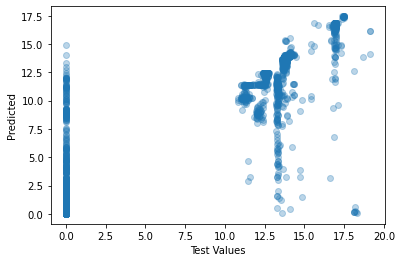

In [ ]:
#TBD
plt.scatter(y_test[:,0],y_pred_rf2[:,0], alpha=0.3)
plt.xlabel('Test Values')
plt.ylabel('Predicted')
plt.show

<function matplotlib.pyplot.show>

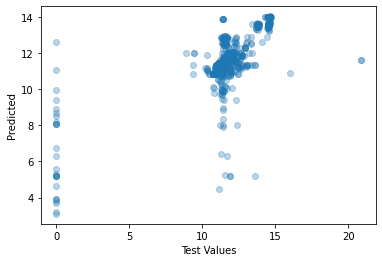

In [ ]:
#TBD
plt.scatter(y_test[:,1],y_pred_rf2[:,1], alpha=0.3)
plt.xlabel('Test Values')
plt.ylabel('Predicted')
plt.show

<function matplotlib.pyplot.show>

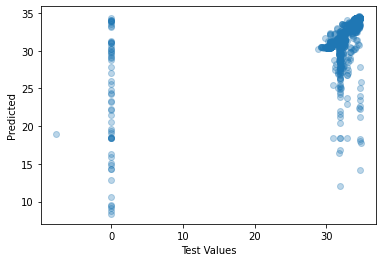

In [ ]:
#TBD
plt.scatter(y_test[:,2],y_pred_rf2[:,2], alpha=0.3)
plt.xlabel('Test Values')
plt.ylabel('Predicted')
plt.show

<function matplotlib.pyplot.show>

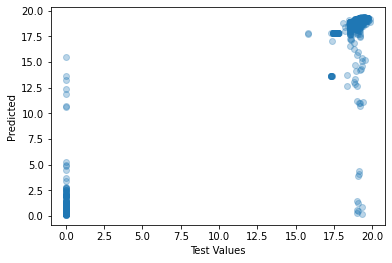

In [ ]:
#TBD
plt.scatter(y_test[:,3],y_pred_rf2[:,3], alpha=0.3)
plt.xlabel('Test Values')
plt.ylabel('Predicted')
plt.show

<function matplotlib.pyplot.show>

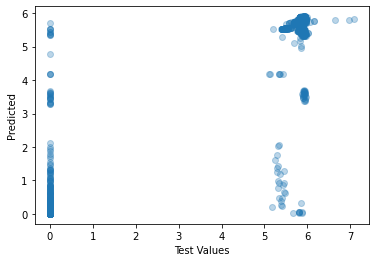

In [ ]:
#TBD
plt.scatter(y_test[:,4],y_pred_rf2[:,4], alpha=0.3)
plt.xlabel('Test Values')
plt.ylabel('Predicted')
plt.show

<function matplotlib.pyplot.show>

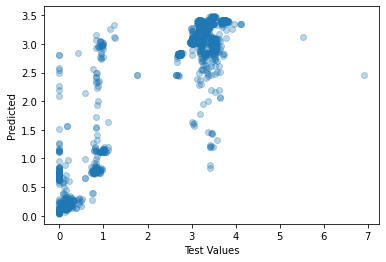

In [ ]:
#TBD
plt.scatter(y_test[:,5],y_pred_rf2[:,5], alpha=0.3)
plt.xlabel('Test Values')
plt.ylabel('Predicted')
plt.show

##Discussing the results##

Several models were created using different regressors, such as:


1.   Simple Linear Regression
2.   Polynominal Linear Regression
3.   Random Forest Regression
4.   Decision Tree Regressor

The model that got the best metrics was the Random Forest Regression followed by the Decision Tree Regressor.

Another model that obtained satisfactory results, taking into account its simplicity was the Simple Linear Regression. If we needed a light weight and simple model to classify our examples, this one could be a good option.

As next steps we could study with more detail how to fit even more our best model, for example by changing the inner parameters or even perform a cross validation and proceed to the model's optimization using Grid Search CV or Randomized Search CV.



